# Problem Statement:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("Fraud_check.csv")

# Data Exploration

In [3]:
df.shape

(600, 6)

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
191,NO,Single,70819,176341,7,YES
204,NO,Married,16992,173091,14,NO
74,NO,Divorced,32434,182319,17,NO
478,NO,Divorced,73795,65242,6,NO
4,NO,Married,81002,27533,28,NO


### Quick Data Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Statistical Summary

In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [10]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []


In [11]:
df[df.duplicated()].shape

(0, 6)

- There is no duplicate values present in dataset.

### Identifying Missing Values

In [13]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Identifying Outliers

<Axes: >

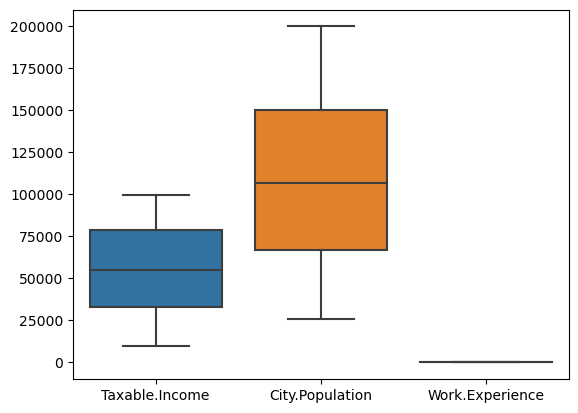

In [14]:
sns.boxplot(data=df)

- With above boxplot we can see there is no outlier present in dataset.

# Making Target Column
-- as per constraint:

-- taxable_income <= 30000 as "Risky" and others are "Good"

In [16]:
def Tagging(income):
    if income <= 30000:
        return "Risky"
    else:
        return "Good"

In [17]:
df['Target']=df['Taxable.Income'].apply(Tagging)

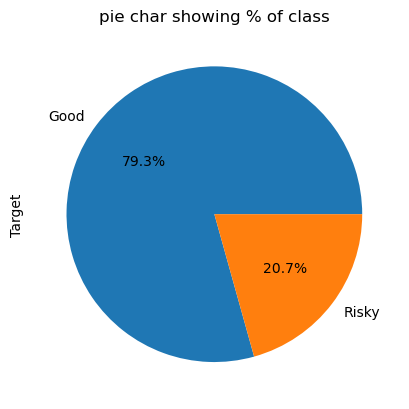

In [18]:
df['Target'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('pie char showing % of class')
plt.show()

In [19]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


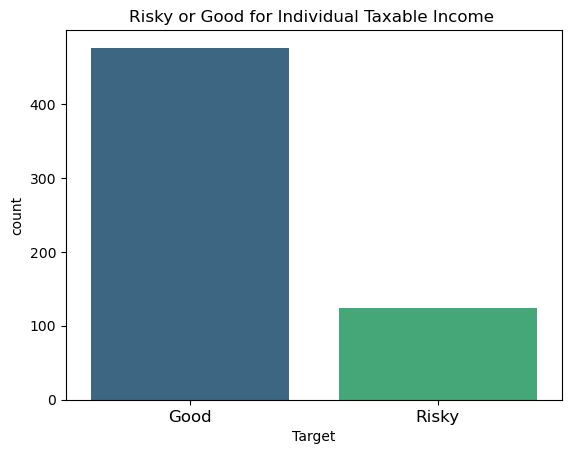

In [20]:
sns.countplot(x='Target', data=df, palette = 'viridis', order=df['Target'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')
plt.show()

- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, 
- i.e one class label has a very high number of observations and the other has a very low number of observations.

- Here, the class “Good” is called the majority class, and the much smaller in size “Risky” class is called the minority class.

# Data Encoding

In [22]:
Objectcol = df.select_dtypes(object).columns
Objectcol

Index(['Undergrad', 'Marital.Status', 'Urban', 'Target'], dtype='object')

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df[Objectcol]=oe.fit_transform(df[Objectcol])

In [24]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


# Data Visualization

[]

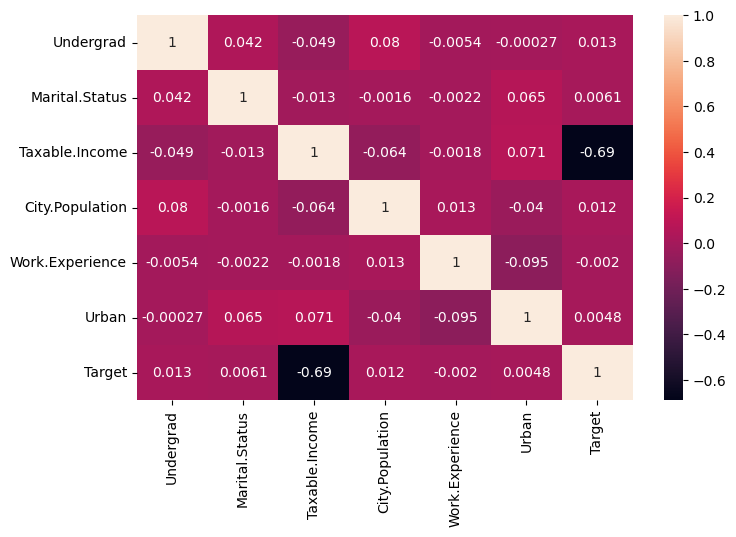

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.plot()

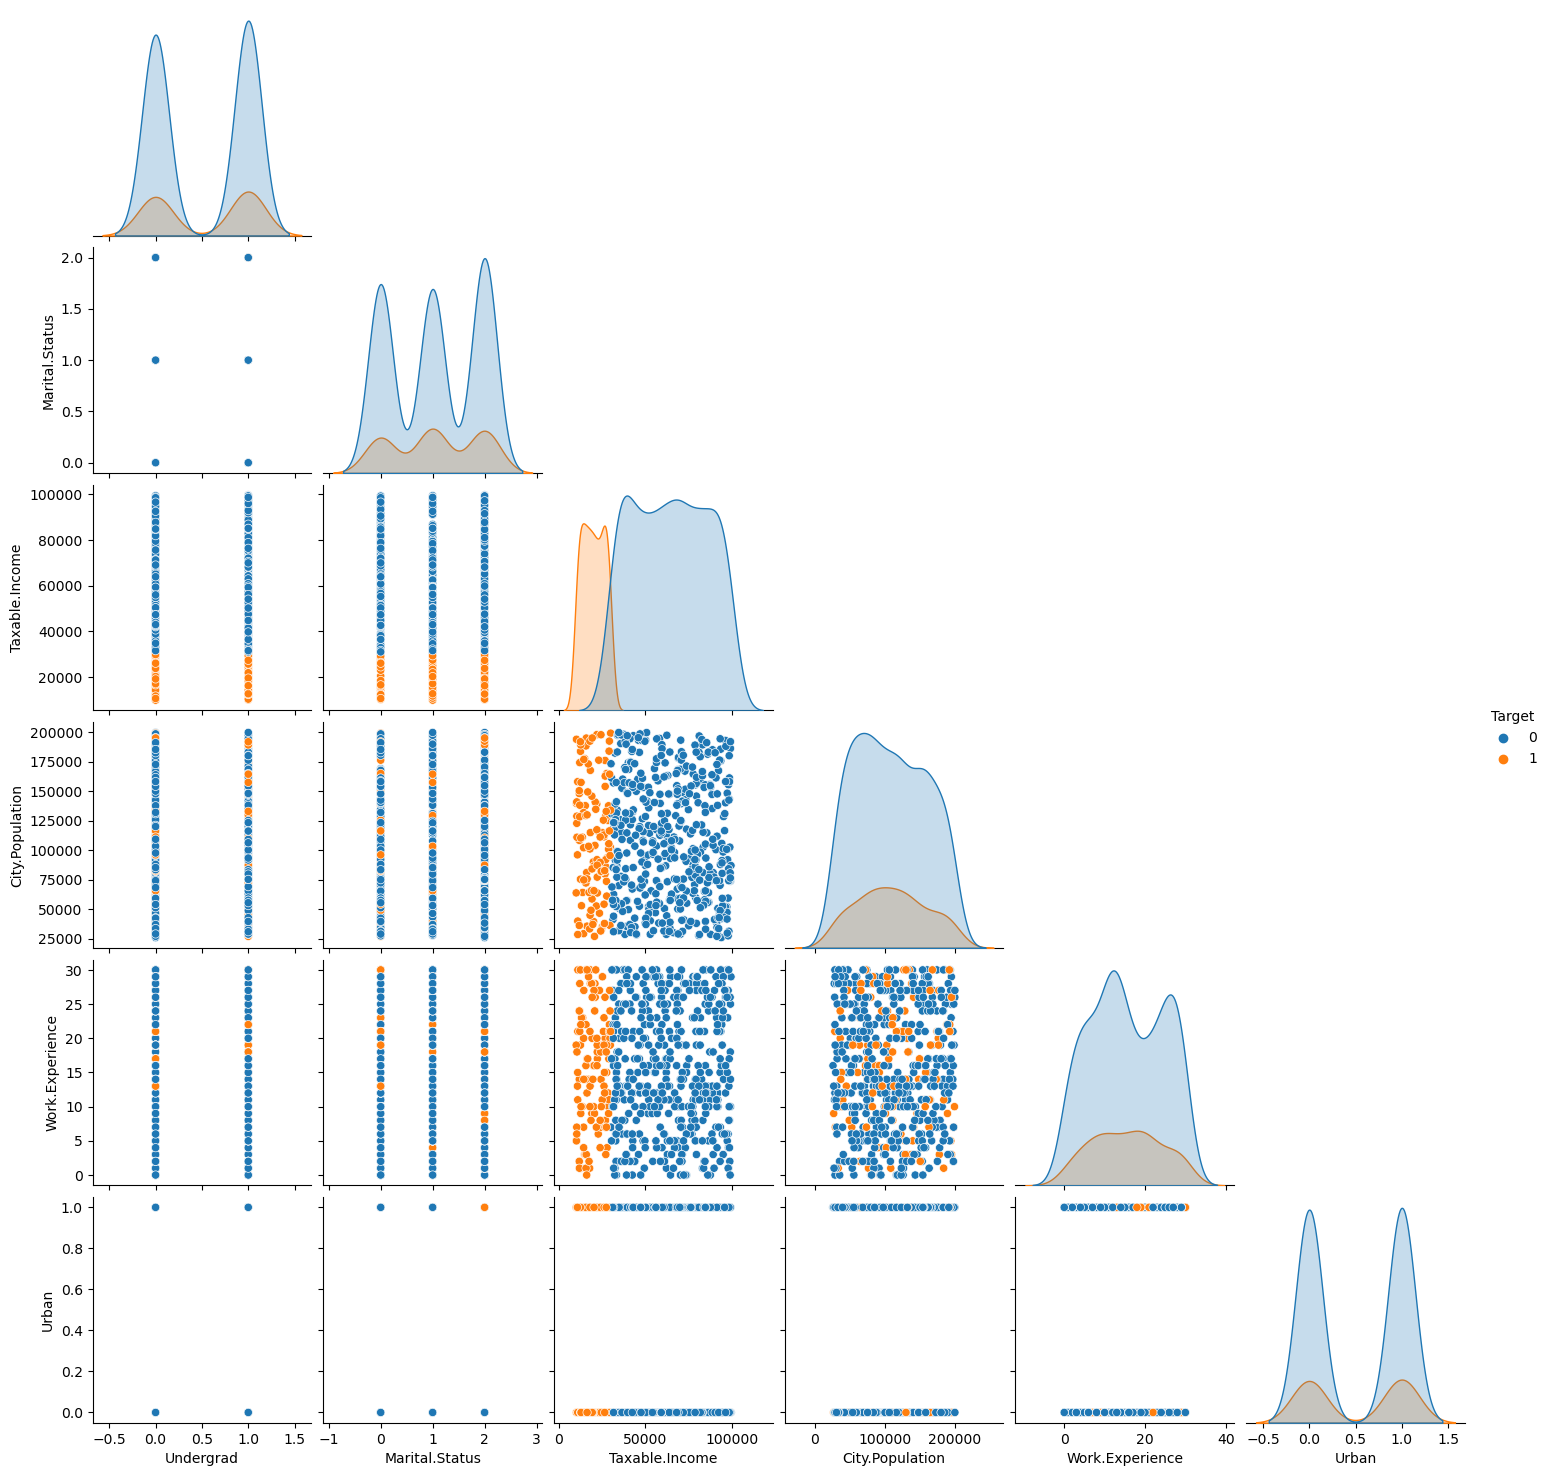

In [26]:
sns.pairplot(df,hue='Target',corner=True)

# Data Splitting

In [27]:
X = df.drop('Target',axis=1)
y = df['Target']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (480, 6)
Shape of X_test:  (120, 6)
Shape of y_train:  (480,)
Shape of y_test: (120,)


In [30]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Model Selection

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

# Model Evaluation

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, ConfusionMatrixDisplay

In [36]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
confusion_matrix(y_test, y_pred)

array([[94,  0],
       [ 0, 26]], dtype=int64)

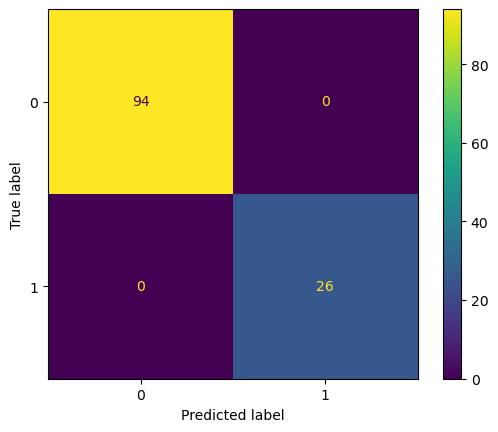

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot();

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [40]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [41]:
X.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [42]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Undergrad,0.0
Marital.Status,0.0
Taxable.Income,1.0
City.Population,0.0
Work.Experience,0.0
Urban,0.0


In [43]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Undergrad,0.0
Marital.Status,0.0
City.Population,0.0
Work.Experience,0.0
Urban,0.0
Taxable.Income,1.0


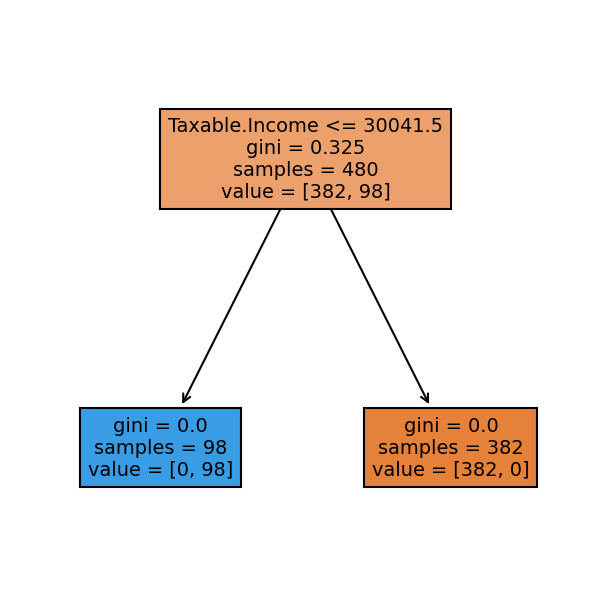

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

# Handling Imbalance Dataset - SMOTE

In [1]:
from collections import Counter
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

## Hyper Parameter Tunning

In [45]:
def report_model(model):
    model_preds = model.predict(X_test)
    train_Score=model.score(X_train,y_train)
    test_Score=model.score(X_test,y_test)
    
    print(classification_report(y_test,model_preds))
    print('\n')
    print(ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot())
    print('\n')
    plt.figure(figsize=(6,6),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

#     plt.figure(figsize=(12,8),dpi=200)
#     plot_tree(model,filled=True,feature_names=X.columns);
#     print(f"train:-{train_Score}\ntest:- {test_Score}")
#     print()
#     print(sns.heatmap(confusion_matrix(y_test,model_preds),annot=True))
#     print(classification_report(y_test,model_preds))
#     print('\n')
#     plt.figure(figsize=(12,8),dpi=150)
#     plot_tree(model,filled=True,feature_names=x.columns);
    
    
#     def report_model(model):
#     model_preds = model.predict(X_test)
#     print(classification_report(y_test,model_preds))
#     print('\n')
#     print(ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot();)
#     print('\n')
#     plt.figure(figsize=(12,8),dpi=200)
#     plot_tree(model,filled=True,feature_names=X.columns);

- The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

- The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

- max_features : int, float or {"auto", "sqrt", "log2"}, default=None The number of features to consider when looking for the best split

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120







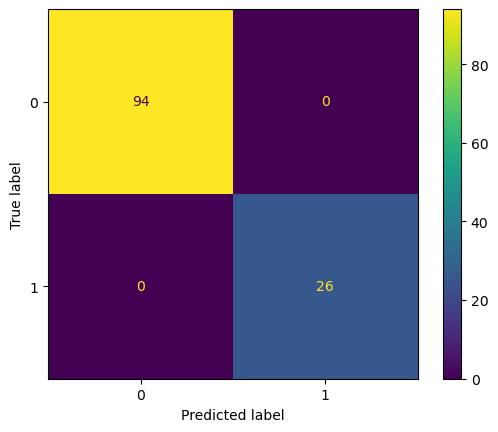

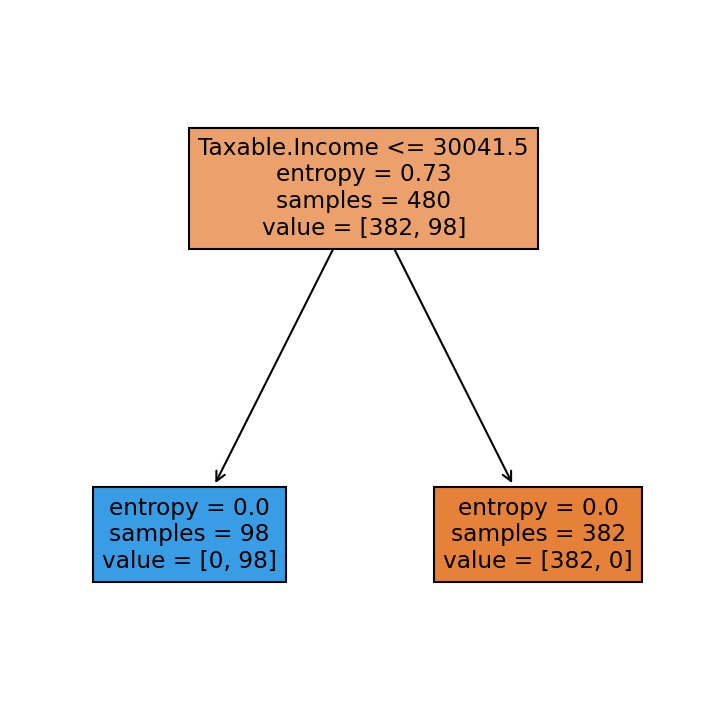

In [46]:
pruned_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_depth': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3]}


grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=10,n_jobs=-1,verbose=3)

In [49]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [50]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120







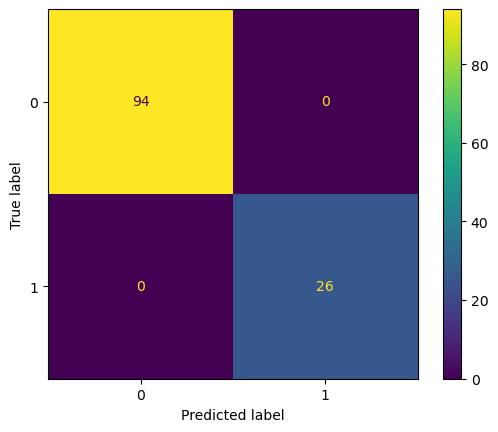

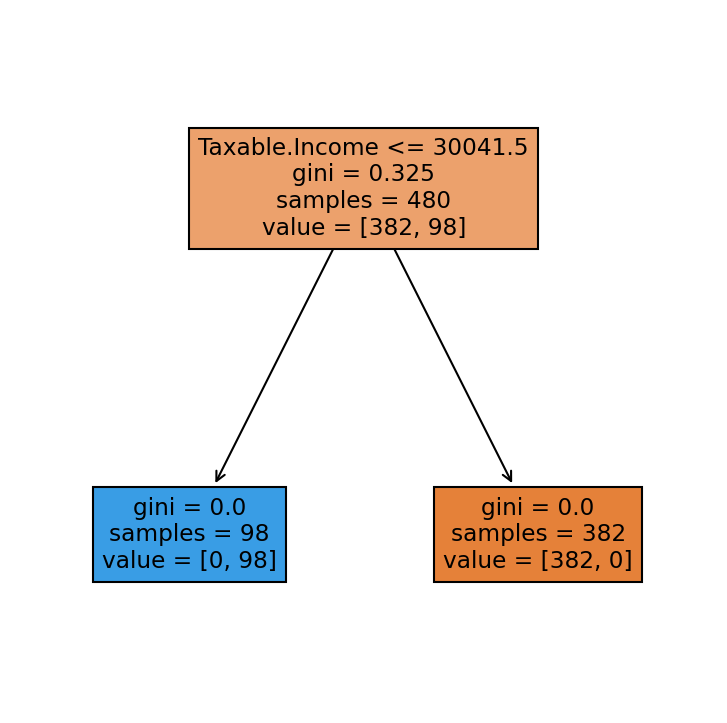

In [51]:
report_model(grid.best_estimator_)

In [52]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_leaf_nodes': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5]}

grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=5,n_jobs=-1,verbose=3)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [54]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120







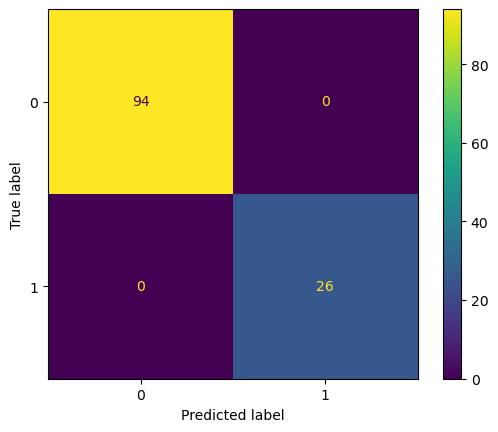

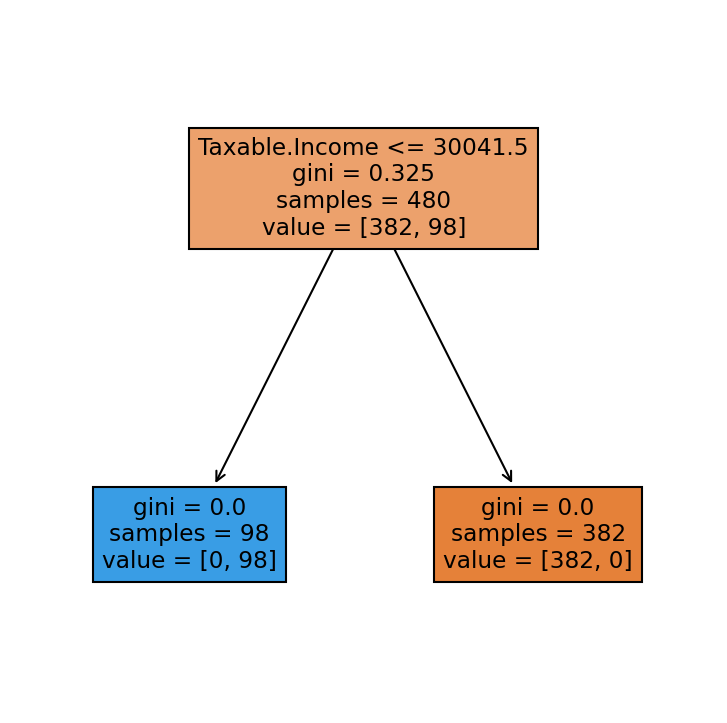

In [55]:
report_model(grid.best_estimator_)

# Model Deployment

In [56]:
# from joblib import dump,load

In [57]:
# dump(final_model, 'dtregmodel.joblib')